In [28]:
!pip install hmmlearn
!pip install yfinance

In [29]:
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data

from hmmlearn.hmm import GaussianHMM # 연속값.

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator
import yfinance as yf
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [30]:
ticker = "TSLA"
yf_ticker = yf.Ticker(ticker)
stocks = yf_ticker.history(period='max')

# stocks.to_csv('data/TSLA_data.csv')

In [31]:
stocks.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-11 00:00:00-04:00,264.269989,274.850006,260.609985,273.579987,174667900,0.0,0.0
2023-09-12 00:00:00-04:00,270.760010,278.390015,266.600006,267.480011,135999900,0.0,0.0
2023-09-13 00:00:00-04:00,270.070007,274.980011,268.100006,271.299988,111673700,0.0,0.0
2023-09-14 00:00:00-04:00,271.320007,276.709991,270.420013,276.040009,107709800,0.0,0.0
2023-09-15 00:00:00-04:00,277.549988,278.980011,271.000000,274.390015,133422800,0.0,0.0


In [32]:
stocks.reset_index(inplace=True,drop=False)
stocks.drop(['Open','High','Low'],axis=1,inplace=True)
stocks['Date'] = stocks['Date'].apply(datetime.datetime.toordinal)
stocks = list(stocks.itertuples(index=False, name=None))

In [33]:
dates = np.array([q[0] for q in stocks], dtype=int)
end_val = np.array([q[1] for q in stocks])
volume = np.array([q[2] for q in stocks])[1:]

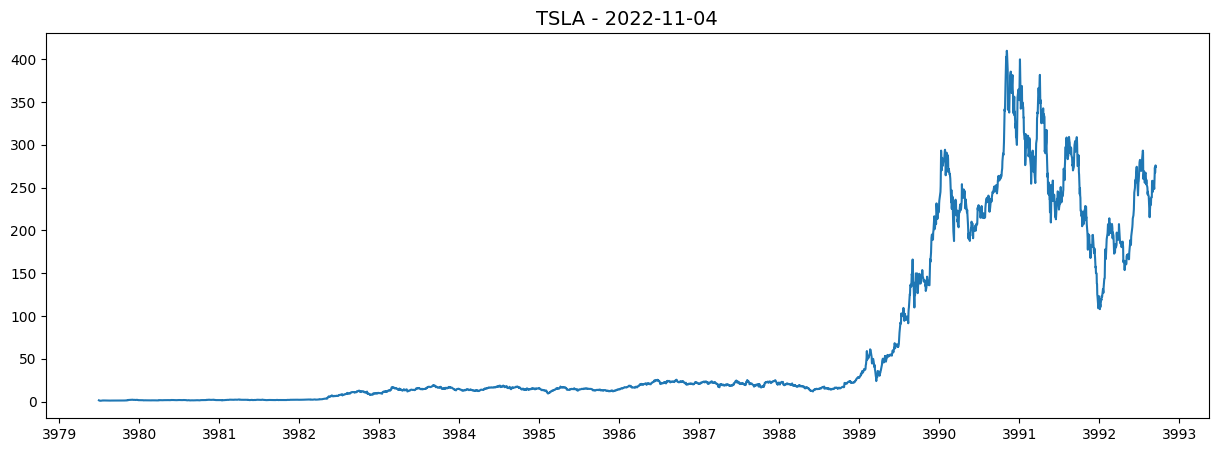

In [34]:
end_date='2022-11-04'
diff = np.diff(end_val)
dates = dates[1:]
end_val = end_val[1:]

X = np.column_stack([diff, volume])
plt.figure(figsize=(15, 5), dpi=100)
plt.title(ticker + " - " + end_date, fontsize = 14)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(dates,end_val,"-")
plt.show()

In [35]:
X.shape

(3326, 2)

In [42]:
model = GaussianHMM(n_components=10, covariance_type="diag", n_iter=10000)
model.fit(X)

GaussianHMM(n_components=10, n_iter=10000)

In [43]:
model.get_params()

{'algorithm': 'viterbi',
 'covariance_type': 'diag',
 'covars_prior': 0.01,
 'covars_weight': 1,
 'implementation': 'log',
 'init_params': 'stmc',
 'means_prior': 0,
 'means_weight': 0,
 'min_covar': 0.001,
 'n_components': 10,
 'n_iter': 10000,
 'params': 'stmc',
 'random_state': None,
 'startprob_prior': 1.0,
 'tol': 0.01,
 'transmat_prior': 1.0,
 'verbose': False}

In [44]:
hidden_states = model.predict(X) # decoding

In [45]:
hidden_states.shape

(3326,)

In [46]:
dates.shape

(3326,)

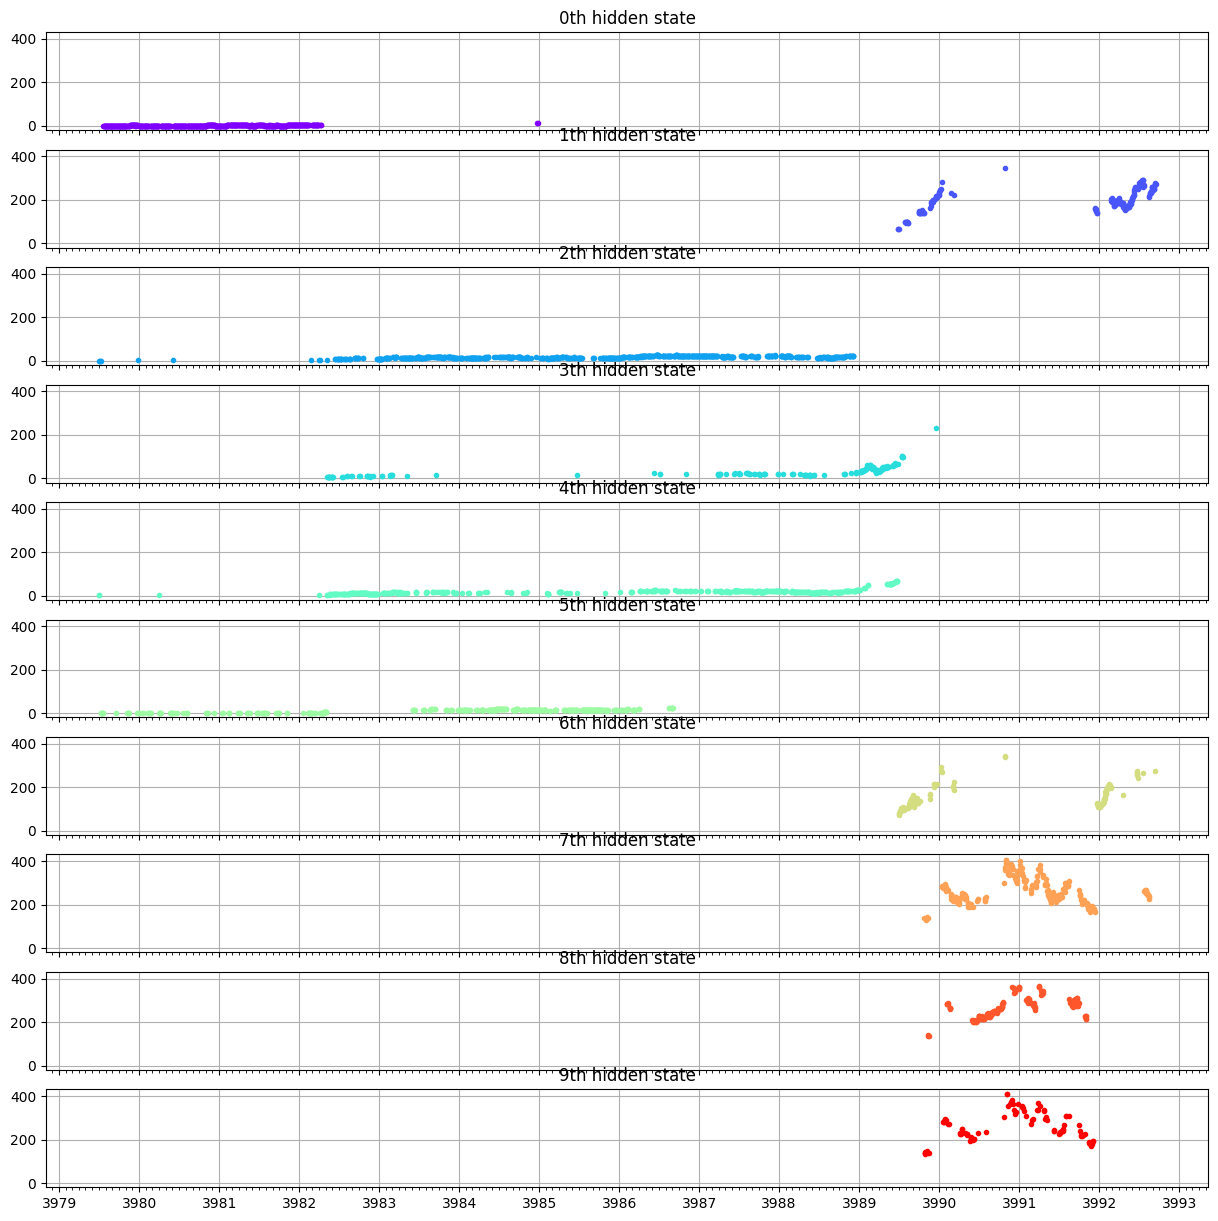

In [47]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], end_val[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)
plt.show()

In [48]:
model.transmat_

array([[9.31068955e-001, 0.00000000e+000, 7.35612654e-014,
        1.37224751e-210, 3.45363977e-003, 6.54774049e-002,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 8.95013732e-001, 3.54508601e-195,
        4.34389047e-003, 1.97413520e-196, 0.00000000e+000,
        6.52673213e-002, 3.53750563e-002, 7.31120423e-070,
        6.97098446e-020],
       [1.54122687e-085, 5.60451448e-036, 7.52206156e-001,
        9.67333699e-003, 1.50373831e-001, 8.77466760e-002,
        2.54133416e-017, 1.95768052e-175, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 5.97971377e-003, 3.49614560e-100,
        7.28464760e-001, 2.56439097e-001, 9.96691120e-113,
        9.11642973e-003, 1.62638331e-232, 0.00000000e+000,
        0.00000000e+000],
       [2.84097835e-207, 1.36399834e-088, 2.52445606e-001,
        8.53006586e-002, 6.60136289e-001, 2.11744660e-003,
        6.17621311e-013, 3.23105839e-186, 0.00000000e+000,
        3.3

In [49]:
model.means_

array([[ 2.03919364e-03,  1.46604764e+07],
       [ 1.20252703e+00,  1.31333281e+08],
       [ 1.52412291e-02,  8.27602662e+07],
       [ 2.13039628e-01,  3.03592166e+08],
       [ 2.86203354e-02,  1.44341404e+08],
       [ 1.11880800e-02,  4.57471489e+07],
       [ 1.52486591e+00,  2.22646141e+08],
       [-7.63146965e-01,  9.80741813e+07],
       [-4.91098926e-01,  5.72595145e+07],
       [ 5.91414002e-01,  7.45549440e+07]])

In [50]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print(params)

    Returns        Volume
0  0.002730  1.714382e+07
1  1.149731  1.368648e+08
2  0.018811  9.090886e+07
3  0.183623  2.609860e+08
4  0.040937  1.421709e+08
5  0.012046  5.018117e+07
6  1.466920  2.112191e+08
7 -0.381733  9.334712e+07
8 -0.501426  6.135775e+07
9 -0.176958  8.425956e+07


In [51]:
lastN = 7
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2)

dates = np.array([q[0] for q in stocks], dtype=int)

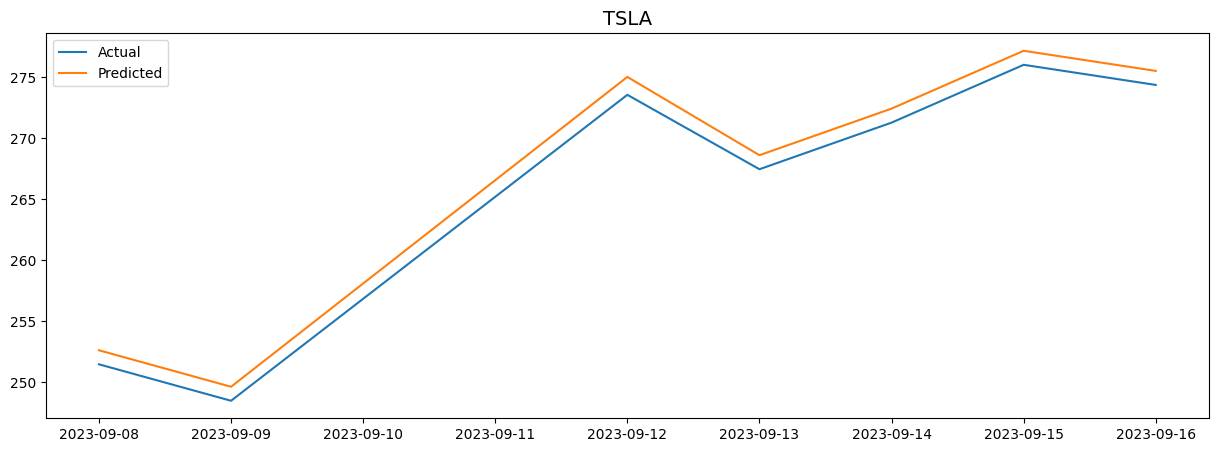

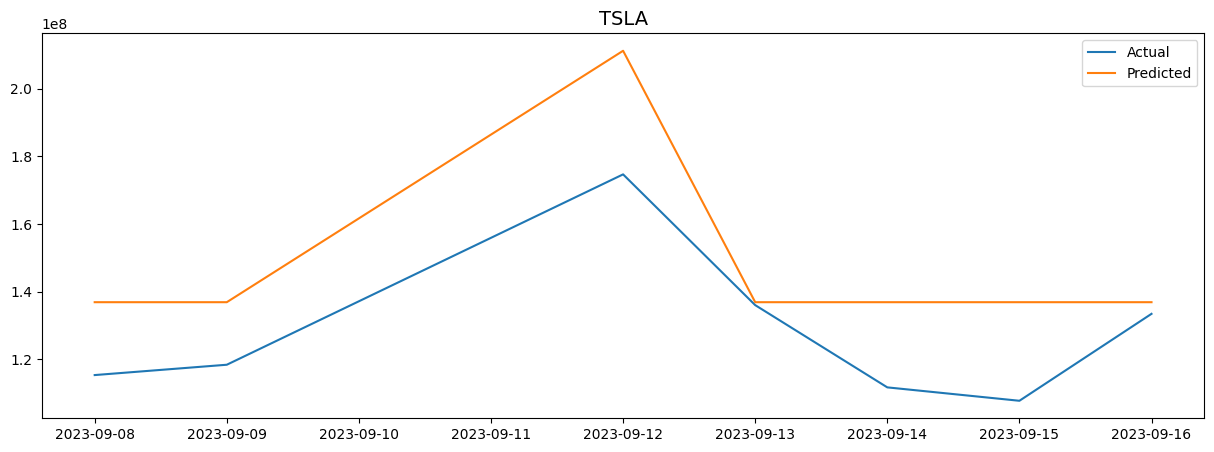

In [52]:
predicted_prices = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_price = stocks[-lastN+idx][1]
    volume = stocks[-lastN+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_prices.append(current_price + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))

#Returns
plt.figure(figsize=(15, 5), dpi=100)
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,end_val[-lastN:])
plt.plot(predicted_dates,predicted_prices)
plt.legend(['Actual','Predicted'])
plt.show()

#Volumes
plt.figure(figsize=(15, 5), dpi=100)
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual','Predicted'])
plt.show()

In [21]:
print('Actual:',end_val[-lastN:], '\n','Prediction:', predicted_prices )

Actual: [251.49000549 248.5        273.57998657 267.48001099 271.29998779
 276.04000854 274.39001465] 
 Prediction: [251.69404127671612, 248.70403578355206, 273.7840223558177, 267.6840467698802, 271.5040235765208, 276.24404432847393, 274.59405043198956]
